<a href="https://colab.research.google.com/github/PravalikaMuthoju/AIML_2303A52347/blob/main/LAB_EXAM%20-PRAVALIKA(2347).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  WEATHER FORECAST USING SUPPORT VECTOR MACHINE  

IMPORTING **LIBRARIES**

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [4]:

%matplotlib inline

# READING THE DATASET

In [6]:
data= pd.read_csv('/content/archive (24).zip')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [9]:
data.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [10]:
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [11]:
data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [17]:
Features=(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'])

# CHECKING FOR NULL **VALUES**

In [22]:

np.sum(pd.isnull(data).sum())

0

FEATURE ***SELECTION***

In [48]:


data['Rain'] = LabelEncoder().fit_transform(data['Rain'])

# Split data into features and target
X = data.drop('Rain', axis=1)
y = data['Rain']

In [49]:
label_encoder = LabelEncoder()
data['Rain'] = label_encoder.fit_transform(data['Rain'])

In [23]:
l =len(data.columns)
l

6

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


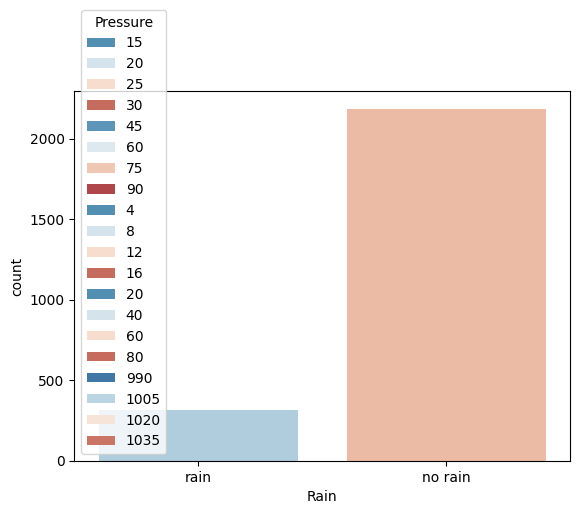

In [26]:
l =len(data.columns)
for i in range(l):

  sns.countplot(x='Rain',hue=data.columns[i],data=data, palette='RdBu_r',)

# TRAIN TEST AND SPLIT

In [28]:

df_feat = data.drop('Rain',axis=1)
#df_feat.head()
df_feat.shape


df_target = data['Rain']

df_target.shape

(2500,)

In [43]:
from sklearn.model_selection import train_test_split


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
df_feat.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2500, 5), (1750, 5), (750, 5), (1750,), (750,))

# MODEL TRAINING

In [33]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

#  PREDICTIONS AND EVALUATIONS

CONFUSION MATRIX AND ACCURACY

In [34]:

predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [37]:
svm= SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_linear = svm.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

print("Linear Kernel SVM:")
print("Accuracy:", accuracy_linear)
print("Confusion Matrix:\n", conf_matrix_linear)

Linear Kernel SVM:
Accuracy: 0.922
Confusion Matrix:
 [[415  14]
 [ 25  46]]


In [51]:
def train_and_evaluate_svm(kernel, X_train, X_test, y_train, y_test):
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, conf_matrix

In [45]:

print("Without Feature Scaling:")
accuracy_linear, conf_matrix_linear = train_and_evaluate_svm('linear', X_train, X_test, y_train, y_test)
accuracy_rbf, conf_matrix_rbf = train_and_evaluate_svm('rbf', X_train, X_test, y_train, y_test)
print(f"Linear Kernel Accuracy: {accuracy_linear}")
print(f"RBF Kernel Accuracy: {accuracy_rbf}")

Without Feature Scaling:
Linear Kernel Accuracy: 0.92
RBF Kernel Accuracy: 0.8746666666666667


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:


print("\nWith Feature Scaling:")
accuracy_linear_scaled, conf_matrix_linear_scaled = train_and_evaluate_svm('linear', X_train_scaled, X_test_scaled, y_train, y_test)
accuracy_rbf_scaled, conf_matrix_rbf_scaled = train_and_evaluate_svm('rbf', X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Linear Kernel Accuracy: {accuracy_linear_scaled}")
print(f"RBF Kernel Accuracy: {accuracy_rbf_scaled}")


With Feature Scaling:
Linear Kernel Accuracy: 0.9213333333333333
RBF Kernel Accuracy: 0.968
